 
# Specifying node colormaps

[Open interactive notebook in Binder](https://mybinder.org/v2/gh/wiheto/netplotbrain/main?filepath=docs/gallery/node_cmap.ipynb)

See [example about colors for different way the color columns in the dataframe can be specified](https://www.netplotbrain.org/gallery/specifying_node_color/) 

There are two different ways to specify colormaps. This holds for both nodes (node_cmap) edges (edge_cmap)

The first way entails that you specify a matplotlib colormap (e.g. Set1, Inferno, (see options [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html)) 

The second way is to provide a list of matplotlib colors to create your own colormap (see named color options [here](https://matplotlib.org/stable/gallery/color/named_colors.html))

This notebook will shows an example of each of these. We will use 100 ROIs from the Schaefer atlas and color the 7 Yeo networks

In [1]:
# Import necessary packages 
import netplotbrain
import pandas as pd
import templateflow.api as tf

In [2]:
# Load templateflow information about the Schaefer atlas
atlasinfo = tf.get(template='MNI152NLin2009cAsym',
                   atlas='Schaefer2018',
                   desc='100Parcels7Networks',
                   extension='.tsv')
atlas_df = pd.read_csv(str(atlasinfo), sep='\t')
atlas_df.head()

,index,name,color
0,1,7Networks_LH_Vis_1,#781283
1,2,7Networks_LH_Vis_2,#781284
2,3,7Networks_LH_Vis_3,#781285
3,4,7Networks_LH_Vis_4,#781287
4,5,7Networks_LH_Vis_5,#781288


In [3]:
# Create a column called "network" by extracting the relevant information from the column "name"
atlas_df['network'] = list(map(lambda x: x.split('_')[2], atlas_df.name.values))
atlas_df.head()

,index,name,color,network
0,1,7Networks_LH_Vis_1,#781283,Vis
1,2,7Networks_LH_Vis_2,#781284,Vis
2,3,7Networks_LH_Vis_3,#781285,Vis
3,4,7Networks_LH_Vis_4,#781287,Vis
4,5,7Networks_LH_Vis_5,#781288,Vis


In [4]:
# Define the TemplateFlow parcels that we want to plot 
nodes = {'template': 'MNI152NLin2009cAsym',
         'atlas': 'Schaefer2018',
         'desc': '100Parcels7Networks',
         'resolution': 1}

(<Figure size 216x252 with 2 Axes>,
 [<Axes3D: title={'center': 'Left'}>, <Axes: >])

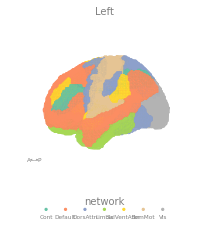

In [5]:
# Plot with a the Set2 colormap
netplotbrain.plot(nodes=nodes, 
                  node_type='parcels', 
                  nodes_df=atlas_df, 
                  node_color='network', 
                  node_cmap='Set2')

In [6]:
# Create custom colormap
node_cmap = ['blue', 'red', 'green', 'black', 'purple', 'yellow', 'orange']

(<Figure size 216x252 with 2 Axes>,
 [<Axes3D: title={'center': 'Left'}>, <Axes: >])

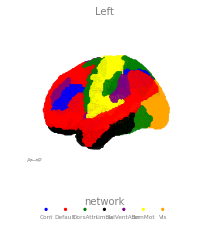

In [7]:
# Plot with a the custom colormap
netplotbrain.plot(nodes=nodes, 
                  node_type='parcels', 
                  nodes_df=atlas_df, 
                  node_color='network', 
                  node_cmap=node_cmap)